Задача 1. Описание эксперимента: поиск (нахождение, точное определение) рамок чёрного цвета разной ширины при помощи ИИ. Пока работаем с упрощёнными рамками: 3х26х3; 7х18х7; 11х10х11 (размеры рамок и незакрытого изображения приведены к 32x32; 1-ая и 3-я цифры - пропорциональные размеры рамок, 2-ая цифра - размер незакрытого изображения).

Задача решена для размера рамки 3x26x3, 60 изображений. Принцип работы программы - скользящее окно

In [1]:
import cv2, os, numpy as np
from scipy.signal import convolve
from copy import deepcopy

cur_fld = os.path.abspath(os.getcwd()) #текущая папка
fld_in = os.path.join(cur_fld,'G32V3H0') #папка со входными изображениями
fld_out = os.path.join(cur_fld,'G32V3H0_out')
cat = os.listdir(fld_in)

Берем все изображения, обрабатываем без сжатия и сохраняем. Примерно каждое 10-е изображение будем отрисовывать

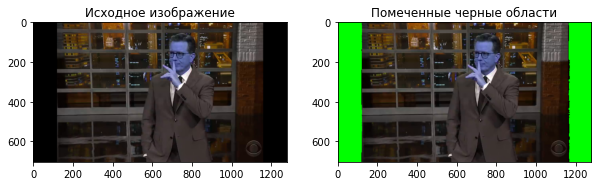

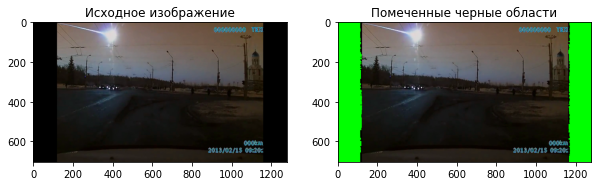

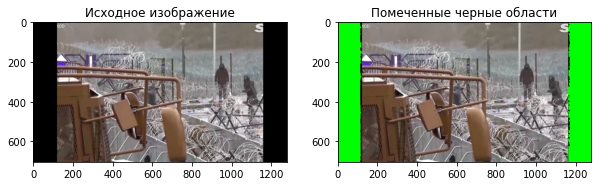

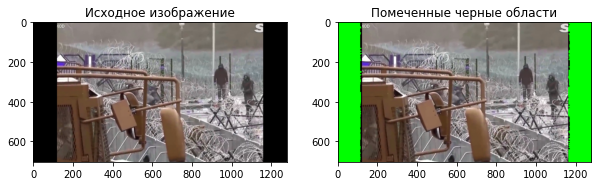

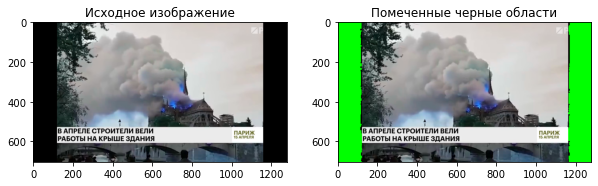

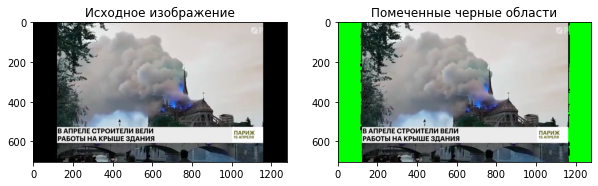

In [5]:
import matplotlib.pyplot as plt

for nme in cat:
    img = cv2.imread(os.path.join(fld_in,nme))
    
    mask = np.ones(shape=(3,26,3)) #маска для двумерной свертки (поиск черных областей размера 3*26)
    mask_sze = mask.shape
    img_sze = img.shape
    img_out = np.zeros(shape=(img_sze[0]-mask_sze[0]+1,img_sze[1]-mask_sze[1]+1)) #значения сумм пикселей по окну
    img_out_sze = img_out.shape
    
    for i in range(img_out_sze[0]):
        for j in range(img_out_sze[1]):
            p1 = img[i:i+mask_sze[0],j:j+mask_sze[1],:]
            img_out[i,j] = np.mean(p1)
        
    
    img_out_boxes = deepcopy(img) #копия исходного изображения (для закраски черных областей)
    img_out = img_out == 0 #маска черного цвета
    
    for i in range(img_out_sze[0]):
        for j in range(img_out_sze[1]):
            if img_out[i,j]: #закрашиваем зеленым цветом
                img_out_boxes[i:i+mask_sze[0],j:j+mask_sze[1],0] = 0
                img_out_boxes[i:i+mask_sze[0],j:j+mask_sze[1],1] = 255
                img_out_boxes[i:i+mask_sze[0],j:j+mask_sze[1],2] = 0
            
        
    
    cv2.imwrite(os.path.join(fld_out,nme),img_out_boxes)
    
    #отрисовка результатов
    kubik = np.random.random()
    
    if kubik<0.1:
        fig, axs = plt.subplots(1,2,figsize=(10,6))
        axs[0].imshow(img)
        axs[0].set_title('Исходное изображение')
        axs[1].imshow(img_out_boxes)
        axs[1].set_title('Помеченные черные области')